<a href="https://colab.research.google.com/github/abhigyan13/neural_style_transfer/blob/master/neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

import pprint
%matplotlib inline


In [218]:
%matplotlib inline

import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
from PIL import Image

lr = 8.0
#specify learning rate
size = 224
iterations = 500
style_wt = 1e5
#style_weight
content_wt = 1
#content_weight

content_image_path = "gdrive/My Drive/C1.jpeg"
#input_content_image_path
style_image_path = "gdrive/My Drive/S5"
#input_style_image_path
style_layer_wts = [0.6, 0.4, 0.2,0.2, 0.2]

In [219]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [220]:
model = tf.keras.applications.vgg19.VGG19(include_top=False, weights="imagenet", input_shape=(size, size, 3))
model.trainable = False
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [221]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(size, size))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return np.expand_dims(img, axis = 0)

In [222]:
def generate_noise_image(content_image, noise_ratio = 0):
    
    # Generate a random noise_image
    noise_image = np.random.uniform(-20, 20, (1, size, size, 3)).astype('float32')
    
    # Set the input_image to be a weighted average of the content_image and a noise_image
    input_image = noise_image * noise_ratio + content_image * (1 - noise_ratio)
    
    return input_image

In [223]:
def deprocess(x):
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x

def display_image(image):
    if len(image.shape) == 4:
        image = image[0,:,:,:]

    img = deprocess(image)
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()

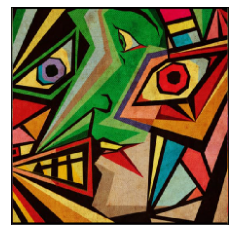

In [224]:
display_image(preprocess_image(style_image_path))

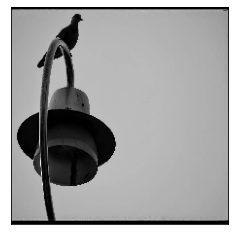

In [225]:
display_image(preprocess_image(content_image_path))

In [226]:
content_layer = 'block4_conv2'

content_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=model.get_layer(content_layer).output
)

In [227]:
style_layers = [
    'block1_conv1', 'block2_conv1',
    'block3_conv1', 'block4_conv1',
    'block5_conv1'
    ]

style_models = [
    tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer).output)
    for layer in style_layers
]

In [228]:
def content_cost(content_img, generated_img):
    C = content_model(content_img)
    G = content_model(generated_img)
    cost = tf.reduce_mean(tf.square(C - G))
    return cost

In [229]:
def gram_matrix(M):
    num_channels = tf.shape(M)[-1]
    M = tf.reshape(M, shape=(-1, num_channels))
    n = tf.shape(M)[0]
    G = tf.matmul(tf.transpose(M), M)
    return G / tf.cast(n, dtype=tf.float32)

In [230]:
def style_cost(style_img, generated_img):
    total_cost = 0
    
    for i, style_model in enumerate(style_models):
        S = style_model(style_img)
        G = style_model(generated_img)
        GS = gram_matrix(S)
        GG = gram_matrix(G)
        current_cost = style_layer_wts[i] * tf.reduce_mean(tf.square(GS - GG))
        total_cost += current_cost
    
    total_cost /= (size * size * len(style_models))
    return total_cost

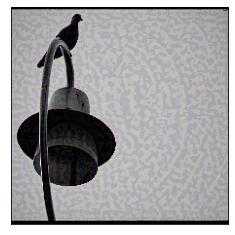

Iteration:1/500, Total Cost:96261136384.0, Style Cost: 962611.375, Content Cost: 0.0


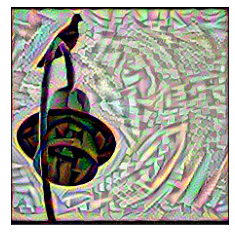

Iteration:41/500, Total Cost:2843459840.0, Style Cost: 28424.732421875, Content Cost: 986545.3125


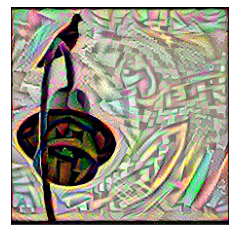

Iteration:81/500, Total Cost:1136356480.0, Style Cost: 11353.12890625, Content Cost: 1043620.0625


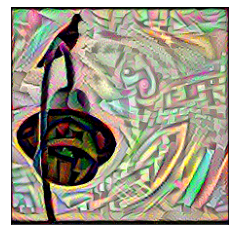

Iteration:121/500, Total Cost:733593088.0, Style Cost: 7325.19384765625, Content Cost: 1073720.375


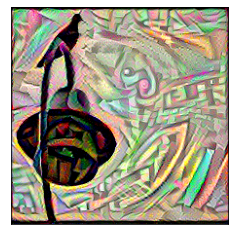

Iteration:161/500, Total Cost:554796864.0, Style Cost: 5537.0185546875, Content Cost: 1095026.25


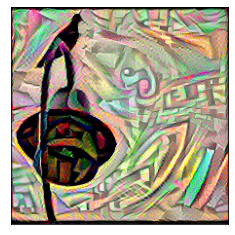

Iteration:201/500, Total Cost:455001760.0, Style Cost: 4538.91259765625, Content Cost: 1110509.375


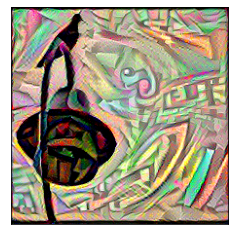

Iteration:241/500, Total Cost:388766240.0, Style Cost: 3876.42138671875, Content Cost: 1124099.25


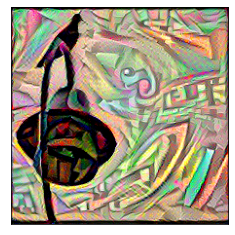

Iteration:281/500, Total Cost:344383744.0, Style Cost: 3432.447265625, Content Cost: 1139003.0


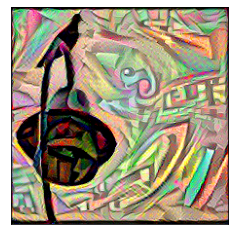

Iteration:321/500, Total Cost:310022336.0, Style Cost: 3088.74755859375, Content Cost: 1147571.0


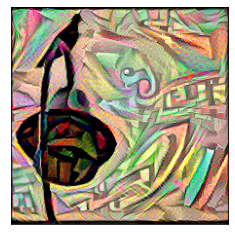

Iteration:361/500, Total Cost:283399616.0, Style Cost: 2822.451171875, Content Cost: 1154480.375


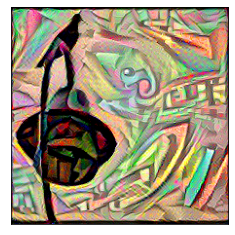

Iteration:401/500, Total Cost:274137856.0, Style Cost: 2729.837890625, Content Cost: 1154082.0


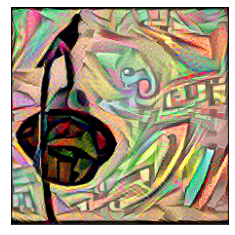

Iteration:441/500, Total Cost:263586496.0, Style Cost: 2624.15966796875, Content Cost: 1170523.875


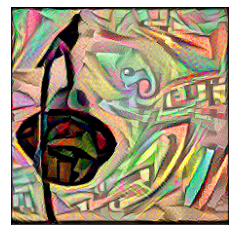

Iteration:481/500, Total Cost:255295312.0, Style Cost: 2541.333740234375, Content Cost: 1161943.5


In [235]:
content_image_preprocessed = preprocess_image(content_image_path)
style_image_preprocessed = preprocess_image(style_image_path)
generated_image= generate_noise_image(content_image_preprocessed)
generated_image =  tf.Variable(generated_image, dtype=tf.float32)

generated_images = []
costs = []

optimizer = tf.optimizers.Adam(learning_rate=lr)

for i in range(iterations):
    
    with tf.GradientTape() as tape:
        J_content = content_cost(content_img=content_image_preprocessed, generated_img=generated_image)
        J_style = style_cost(style_img=style_image_preprocessed, generated_img=generated_image)
        J_total = content_wt * J_content + style_wt * J_style
    
    gradients = tape.gradient(J_total, generated_image)
    optimizer.apply_gradients([(gradients, generated_image)])
    
    costs.append(J_total.numpy())
    
    if i % 40 == 0 or i== 1000:
        display_image(generated_image.numpy())
        generated_images.append(generated_image.numpy())
        print("Iteration:{}/{}, Total Cost:{}, Style Cost: {}, Content Cost: {}".format(i+1, iterations, J_total, J_style, J_content))

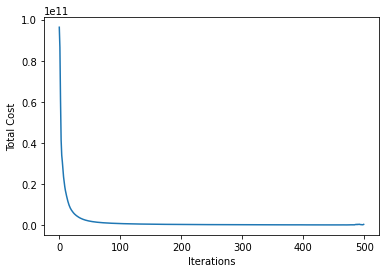

In [232]:
plt.plot(range(iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Total Cost")
plt.show()

In [233]:
image = Image.fromarray(deprocess(generated_images[-1][0]))

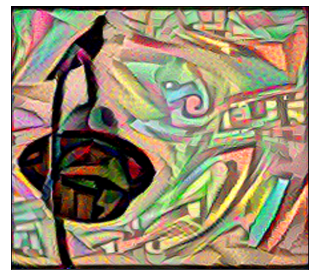

In [234]:
image1 = Image.open(content_image_path)
width_in, height_in = image1.size
image=image.resize((width_in,height_in))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.savefig('gdrive/My Drive/out10.jpg')